# Sketching a daylight function

![](daylight_data_sketching.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
# from mpl_toolkits.mplot3d import Axes3D
import make_a_data_object.models
%matplotlib inline
%load_ext autoreload
%autoreload 2

Available input is length of day, in hours.

Stitch together two (co)sine functions, one for the day and one for the night? But what about just transposing a sine function along the $y$ axis?

## Some text data and interactively exploring shape of a function generator

Some data from [timeanddate.com for January 2017](https://www.timeanddate.com/sun/denmark/copenhagen?month=1&year=2017) and other months, for the first of each month. Just decimals, but a proper conversion to $\frac{n}{60}$ this necessary of course.

![](https://c.tadst.com/gfx/n/tad-logo-com3.png)

In [2]:
day_lengths = [7.09, 8.41, 10.44, 13.07, 15.2, 17.08, 17.25, 15.59, 13.48, 11.32, 9.14, 7.27]

In [3]:
for dayhours in day_lengths:
    # h for hours
    # m for measure
    dh = 7 / 24 * dayhours
    dm = 450 / dh
    nh = 7 / 24 * (24 - dayhours)
    nm = 450 / nh
    print(f"{450 / 7:.1f} mm per day, {dm:5.1f} for the {'🌤' * int(dh)} and {nm:.1f} for the {'🌙' * int(nh)}")

64.3 mm per day, 217.6 for the 🌤🌤 and 91.2 for the 🌙🌙🌙🌙
64.3 mm per day, 183.5 for the 🌤🌤 and 99.0 for the 🌙🌙🌙🌙
64.3 mm per day, 147.8 for the 🌤🌤🌤 and 113.8 for the 🌙🌙🌙
64.3 mm per day, 118.0 for the 🌤🌤🌤 and 141.2 for the 🌙🌙🌙
64.3 mm per day, 101.5 for the 🌤🌤🌤🌤 and 175.3 for the 🌙🌙
64.3 mm per day,  90.3 for the 🌤🌤🌤🌤 and 223.0 for the 🌙🌙
64.3 mm per day,  89.4 for the 🌤🌤🌤🌤🌤 and 228.6 for the 🌙
64.3 mm per day,  99.0 for the 🌤🌤🌤🌤 and 183.5 for the 🌙🌙
64.3 mm per day, 114.5 for the 🌤🌤🌤 and 146.7 for the 🌙🌙🌙
64.3 mm per day, 136.3 for the 🌤🌤🌤 and 121.7 for the 🌙🌙🌙
64.3 mm per day, 168.8 for the 🌤🌤 and 103.8 for the 🌙🌙🌙🌙
64.3 mm per day, 212.2 for the 🌤🌤 and 92.2 for the 🌙🌙🌙🌙


A small interactive exploration tool.

[![](https://scontent-arn2-1.cdninstagram.com/vp/9fda5f105c9619465a1125e9a16eae8c/5B7C2344/t51.2885-15/e35/35934490_241887199952993_199709850345668608_n.jpg)](https://scontent-arn2-1.cdninstagram.com/vp/93a1b6cebcfc6e257f71b89a48914fc8/5B7C06B4/t50.2886-16/35798989_180000802668856_2927614466459270083_n.mp4)

In [4]:
def plot_daylight(dayhours=12):
    """Plot daylight, meant for interaction with IPywidgets."""
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.plot(np.linspace(0, dayhours, 64), np.sin(np.linspace(0, np.pi, 64)), label='day', color='yellow', )
    ax.plot(np.linspace(dayhours, 24, 64), -np.sin(np.linspace(np.pi, 0, 64)), label='night', color='grey')
    ax.axvspan(0, dayhours, color='blue', alpha=.3)
    ax.axvspan(dayhours, 24, color='black', alpha=.3)
    ax.text(dayhours/2, 0, "day")
    ax.text(dayhours + ((24 - dayhours) / 2), 0, "night")
    ax.set_xlim(0, 24)
    ax.set_ylim(-1, 1)

In [5]:
widgets.interactive(plot_daylight,
                    dayhours=(np.floor(np.floor(np.min(day_lengths))),
                              np.floor(np.max(day_lengths)),
                             ))

interactive(children=(FloatSlider(value=12.0, description='dayhours', max=17.0, min=7.0), Output()), _dom_clas…

## Sun in the object context

First let's instantiate a `DataObject`, with some mock data.

In [6]:
data = make_a_data_object.models.Data()
print(f"📜 {data.a}\n🌧 {data.p}")

📜 Lorem ipsum dolor sit amet, consectetur adipiscing elit. Phasellus fermentum egestas mauris vel maximus. Pellentesque tortor urna, eleifend in bibendum ac, auctor sed felis. Curabitur vitae suscipit augue. Aenean eu neque at dolor condimentum vehicula. Integer a consequat nulla. Donec malesuada, elit non scelerisque iaculis, purus nibh viverra ipsum, et lacinia libero quam vitae nibh. Phasellus fringilla tempor finibus. Sed tincidunt semper turpis, vel pellentesque mauris tristique non. Pellentesque vel ligula auctor tortor vehicula placerat in vel erat. Cras tincidunt vehicula sapien, eget molestie ex bibendum sed. Morbi sed nulla sed nulla luctus ultrices ac eu neque. Suspendisse non nunc diam. In et suscipit tortor. Nulla gravida malesuada elit. Morbi convallis orci urna, non lobortis nunc mollis eget. Donec gravida felis at neque porta, nec tempus mi dignissim. Nunc porttitor massa justo, vel ultricies neque rhoncus eget. Mauris nec libero eros. Ut tristique interdum odio dapibus

In [7]:
do = make_a_data_object.models.DataObject(data.a, data.p, 12)

The sun method defined in `DataObject.sun()` looks like this

In [8]:
make_a_data_object.models.DataObject.sun??

Signature: make_a_data_object.models.DataObject.sun(self, t, dayhours)
Source:   
    def sun(self, t, dayhours):
        """This return -1 to 1, how high up in the sky is the sun.
            Not really accurate as sun reaches the same peak throughout the year."""
        # assert t >= 0
        assert t <= 24
        assert dayhours >= 0
        assert dayhours <= 24
        if t < dayhours:
            # return np.sin(np.pi / (dayhours / t))
            return np.sin(np.pi * t / dayhours)
        else:
            return -np.sin(np.pi * (24-t) / (24-dayhours))
File:      ~/dataobject/make_a_data_object/make_a_data_object/models.py
Type:      function


And we can exploit the methods outside of it's object context to visualize different lengths of the day across the year. This is a pretty crude model, but works for now.

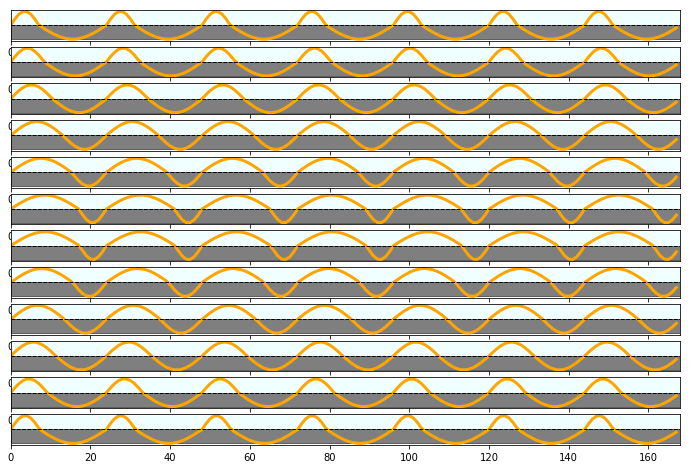

In [9]:
figy, axy = plt.subplots(12, figsize=(12, 8))
for m, d in enumerate(day_lengths):
    h = [do.sun(t, d) for t in range(0, 24)] * 7
    axy[m].set_xlim(0, 24*7)
    axy[m].plot(range(0, 24 * 7), h, color='orange', lw=3)
    axy[m].axhline(0, color='black', ls='--', lw=1)
    axy[m].set_yticks([])
    axy[m].axhspan(0, 1, color='azure')
    axy[m].axhspan(0, -1, color='black', alpha=0.5)

Visualize precipitation data on the left, and two plots with added sun on the right of it.

Text(0.5,1,'Added 7.09 daylight hours')

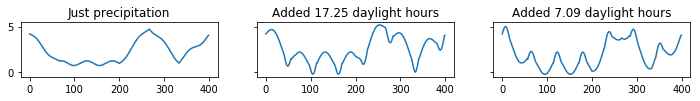

In [10]:
figs, axs = plt.subplots(ncols=3, figsize=(12, 1), sharey=True)
axs[0].plot(do.precipitation)
axs[0].set_title("Just precipitation")
axs[1].plot(np.add(do.precipitation, list(map(lambda d: do.sun(d, np.max(day_lengths)), np.linspace(0, 24, num=int(len(do.precipitation) / 7)))) * 7 + [0]))
axs[1].set_title(f"Added {np.max(day_lengths)} daylight hours")
axs[2].plot(np.add(do.precipitation, list(map(lambda d: do.sun(d, np.min(day_lengths)), np.linspace(0, 24, num=int(len(do.precipitation) / 7)))) * 7 + [0]))
axs[2].set_title(f"Added {np.min(day_lengths)} daylight hours")

# Summary

The effect is very subtle with this test data, but it's there.

In [11]:
spring_do = make_a_data_object.models.DataObject(data.a, data.p, day_lengths[2], alpha=2)
summer_do = make_a_data_object.models.DataObject(data.a, data.p, day_lengths[5], alpha=2)
autumn_do = make_a_data_object.models.DataObject(data.a, data.p, day_lengths[8], alpha=2)
winter_do = make_a_data_object.models.DataObject(data.a, data.p, day_lengths[11], alpha=2)

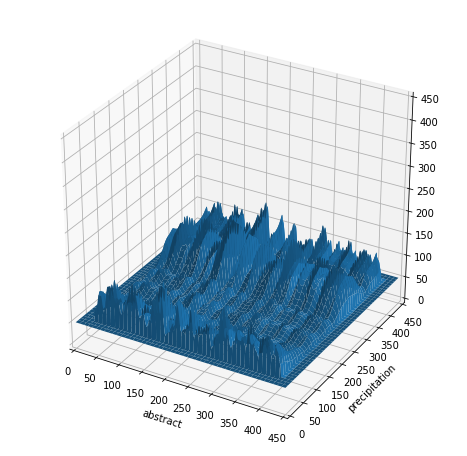

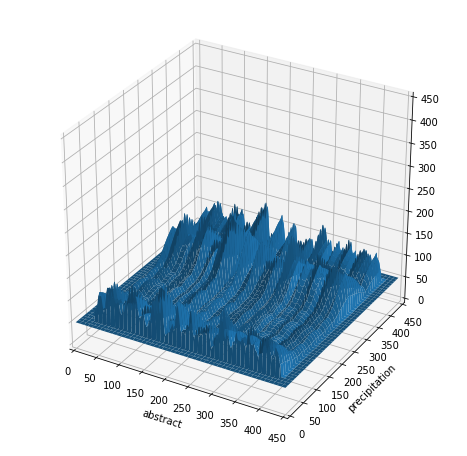

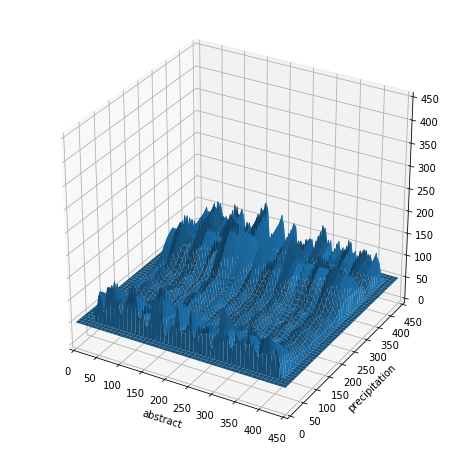

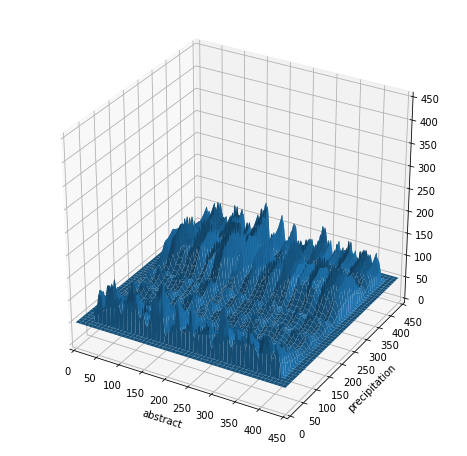

In [12]:
for dataobject in [spring_do, summer_do, autumn_do, winter_do]:
    dataobject.plot_surface(figsize=(8, 8))